<a href="https://colab.research.google.com/github/Ranjani94/Machine_Learning/blob/master/assignment1/Assignment1_Sivaranjani_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DBSCAN - Density Based Spatial Clustering of Application with Noise(SKLearn)

In [0]:
#DBSCAN- Density Based Spatial Clustering of Application with Noise

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
from google.colab import files
from io import BytesIO
upload = files.upload()

Saving AQ_Boston_Cam-Quincy.csv to AQ_Boston_Cam-Quincy (1).csv


In [0]:
data = pd.read_csv("AQ_Boston_Cam-Quincy.csv", header=0)
#data.head()
data.head()

In [33]:
data = data.apply(lambda s:s.str.replace('\'', "").str.replace('[', ""))
data.columns = data.columns.str.strip().str.replace('[', '').str.replace(']', '').str.replace('\'','')
data.drop(data.columns[[10,11,12]], axis=1, inplace=True)
data.head()


,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,Portsmouth,Boston-Cambridge-Quincy,US,2020-02-09T18:00:00.000Z,2020-02-09T13:00:00-05:00,o3,0.035,ppm,43.075371,-70.748017
1,Odiorne State Park,Boston-Cambridge-Quincy,US,2020-02-09T18:00:00.000Z,2020-02-09T13:00:00-05:00,o3,0.038,ppm,43.045269,-70.713958
2,Portsmouth,Boston-Cambridge-Quincy,US,2020-02-09T18:00:00.000Z,2020-02-09T13:00:00-05:00,pm10,10,µg/m³,43.075371,-70.748017
3,Portsmouth,Boston-Cambridge-Quincy,US,2020-02-09T18:00:00.000Z,2020-02-09T13:00:00-05:00,pm25,4.8,µg/m³,43.075371,-70.748017
4,LYNN,Boston-Cambridge-Quincy,US,2020-02-09T17:00:00.000Z,2020-02-09T12:00:00-05:00,no2,0.008,ppm,42.474701,-70.971901


In [48]:
data["location"] = data["location"].astype('category')
data["location"] = data["location"].cat.codes
data["local"] = data["local"].astype('category')
data["local"] = data["local"].cat.codes
data.dtypes


location       int8
city         object
country      object
utc          object
local         int16
parameter    object
value        object
unit         object
latitude     object
longitude    object
dtype: object

In [49]:
data.isnull()

,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False


In [50]:
data.isnull().sum()

location     0
city         0
country      0
utc          0
local        0
parameter    0
value        0
unit         0
latitude     0
longitude    0
dtype: int64

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
location     10000 non-null int8
city         10000 non-null object
country      10000 non-null object
utc          10000 non-null object
local        10000 non-null int16
parameter    10000 non-null object
value        10000 non-null object
unit         10000 non-null object
latitude     10000 non-null object
longitude    10000 non-null object
dtypes: int16(1), int8(1), object(8)
memory usage: 654.4+ KB


In [52]:
table = pd.pivot_table(data, values='value', index=['location', 'local'], columns=['parameter'], aggfunc=np.sum, fill_value=0)
table.reset_index(inplace=True)
table.columns=table.columns.str.strip()
table['co'] = table['co'].astype(float)
table['no2'] = table['no2'].astype(float)
table['o3'] = table['o3'].astype(float)
table['pm10'] = table['pm10'].astype(float)
table['pm25'] = table['pm25'].astype(float)
table['so2'] = table['so2'].astype(float)
#table['co'] = table['co'].apply(lambda x: '{:.2f}'.format(x)).astype(float)
table

parameter,location,local,co,no2,o3,pm10,pm25,so2
0,0,0,0.0,0.008,0.000,0.0,0.0,0.000
1,0,1,0.0,0.009,0.000,0.0,0.0,0.000
2,0,2,0.0,0.008,0.000,0.0,0.0,0.000
3,0,3,0.0,0.008,0.000,0.0,0.0,0.000
4,0,4,0.0,0.007,0.000,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...
3862,7,536,0.0,0.000,0.000,71.0,13.8,0.006
3863,7,537,0.0,0.000,0.034,66.0,13.0,0.004
3864,7,538,0.0,0.000,0.036,30.0,6.8,0.004
3865,7,539,0.0,0.000,0.035,16.0,5.3,0.003


In [0]:
X = table.iloc[:,[4,5]].values

Text(0, 0.5, 'PM10')

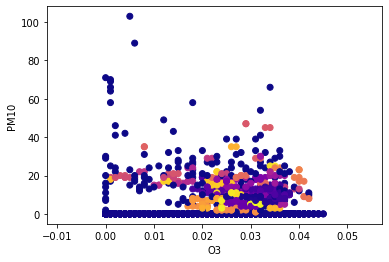

In [54]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# cluster the data into five clusters
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)

# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("O3")
plt.ylabel("PM10")

Text(0, 0.5, 'PM25')

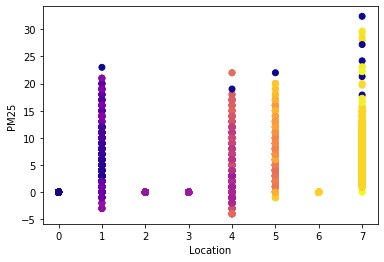

In [55]:
Y = table.iloc[:,[0,6]].values
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(Y)
# cluster the data into five clusters
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(Y_scaled)

# plot the cluster assignments
plt.scatter(Y[:, 0], Y[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Location")
plt.ylabel("PM25")

Text(0, 0.5, 'SO2')

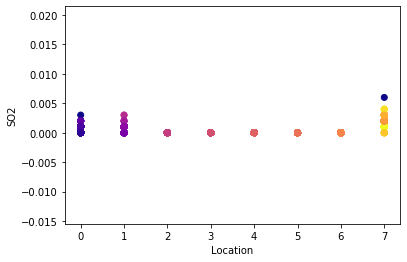

In [56]:
Y = table.iloc[:,[0,7]].values
scaler = StandardScaler()
Y_scaled = scaler.fit_transform(Y)
# cluster the data into five clusters
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(Y_scaled)

# plot the cluster assignments
plt.scatter(Y[:, 0], Y[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Location")
plt.ylabel("SO2")

#K-Means Clustering(SKLearn)

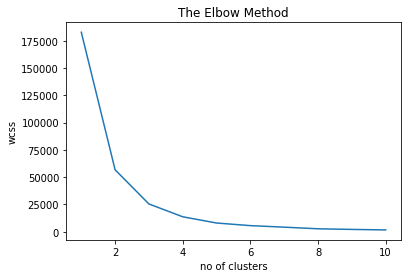

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
X = table.iloc[:,[4,5]].values
score = []

for cluster in range(1,11):
    kmeans = KMeans(n_clusters = cluster, init="k-means++", random_state=10)
    kmeans.fit(X)
    score.append(kmeans.inertia_)
plt.plot(range(1,11), score)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

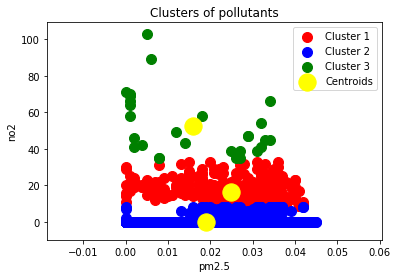

In [44]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
#plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of pollutants')
plt.xlabel('pm2.5')
plt.ylabel('no2')
plt.legend()
plt.show()

#K-Means Clustering(Tensorflow)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
centroids [[5.39463164 0.02183895]
 [2.5042333  0.02522672]
 [0.50807217 0.0095793 ]]


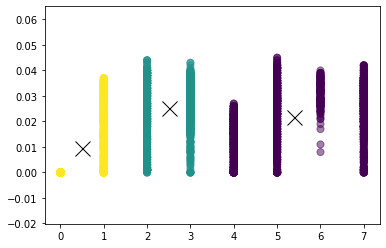

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

#points_n = 200
clusters_n = 3
iteration_n = 100

#points = tf.constant(np.random.uniform(0, 10, (points_n, 2)))
points = table.iloc[:,[0,4]].values
centroids = tf.Variable(tf.slice(tf.random_shuffle(points), [0, 0], [clusters_n, -1]))

points_expanded = tf.expand_dims(points, 0)
centroids_expanded = tf.expand_dims(centroids, 1)

distances = tf.reduce_sum(tf.square(tf.subtract(points_expanded, centroids_expanded)), 2)
assignments = tf.argmin(distances, 0)

means = []
for c in range(clusters_n):
    means.append(tf.reduce_mean(
      tf.gather(points, 
                tf.reshape(
                  tf.where(
                    tf.equal(assignments, c)
                  ),[1,-1])
               ),reduction_indices=[1]))

new_centroids = tf.concat(means, 0)

update_centroids = tf.assign(centroids, new_centroids)
init = tf.global_variables_initializer()

data_tf = tf.convert_to_tensor(points, np.float32)

with tf.Session() as sess:
  sess.run(init)
  for step in range(iteration_n):
    [_, centroid_values, points_values, assignment_values] = sess.run([update_centroids, centroids, data_tf, assignments])
    
  print("centroids", centroid_values)

plt.scatter(points_values[:, 0], points_values[:, 1], c=assignment_values, s=50, alpha=0.5)
plt.plot(centroid_values[:, 0], centroid_values[:, 1], 'kx', markersize=15)
plt.show()